In [1]:
with open('input.dat', 'r') as file:
    lines = [line.strip() for line in file.readlines()]

voxels = set([eval("(" + line + ")") for line in lines])
intVoxels = set()
def calcSA(voxels):
    surfaceArea = 0
    # sides touch if exactly 1 voxel coordinate differs by 1
    for (x, y, z) in voxels:
        voxelSurfaceArea = 6
        # check if neighbours are present
        for dx, dy, dz in [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)]:
            if (x + dx, y+dy, z+dz) in voxels:
                voxelSurfaceArea -= 1
        
        surfaceArea += voxelSurfaceArea
    
    return surfaceArea

print(calcSA(voxels))

# PART 2

# find ranges of x, y and z values
xrange = [min([x for x, _, _ in voxels]), 1 + max([x for x, _, _ in voxels])]
yrange = [min([y for _, y, _ in voxels]), 1 + max([y for _, y, _ in voxels])]
zrange = [min([z for _, _, z in voxels]), 1 + max([z for _, _, z in voxels])]


# loop over all vertical lines and fill up interior volume
for x in range(*xrange):
    for y in range(*yrange):

        try:
            zInteriorStart = min([z for z in range(*zrange) if (x, y, z) in voxels])
            zInteriorEnd = max([z for z in range(*zrange) if (x, y, z) in voxels])
            
            print([z for z in range(*zrange) if (x, y, z) in voxels])
            # loop over drop interor along vertical z line
            for z in range(zInteriorStart, zInteriorEnd):
                # if unfilled
                if (x, y, z) not in voxels:
                    
                    # now we have to check if it is in the interior also in the x and y directions
                    xInteriorStart = min([xx for xx in range(*xrange) if (xx, y, z) in voxels])
                    xInteriorEnd = max([xx for xx in range(*xrange) if (xx, y, z) in voxels])
                    yInteriorStart = min([yy for yy in range(*yrange) if (x, yy, z) in voxels])
                    yInteriorEnd = max([yy for yy in range(*yrange) if (x, yy, z) in voxels])

                    if xInteriorStart < x < xInteriorEnd and yInteriorStart < y < yInteriorEnd:
                        intVoxels.add((x, y, z))
        except:
            continue


# 2392 < ANSWER < 2496
# 2454 wrong
print(calcSA(voxels.union(intVoxels)))

4370
[10]
[12]
[7]
[8, 9, 10, 11, 12]
[9, 11, 12]
[7, 9, 10, 11, 12, 13]
[7, 8, 9, 10, 11, 14]
[8, 9, 10, 11, 12, 13, 14]
[10, 11, 12]
[10, 11, 13]
[10, 11]
[9, 10, 11, 12, 13]
[7, 9, 10, 11, 12, 13, 14]
[7, 8, 9, 10, 11, 12, 13, 15]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[6, 7, 8, 9, 10, 11, 12, 13, 14]
[7, 8, 9, 10, 11, 12, 13, 14]
[8, 10, 11, 12, 13, 14]
[10, 12]
[11]
[8, 9, 11]
[6, 8, 9, 10, 11, 12, 13]
[5, 7, 8, 9, 10, 11, 12, 13, 15, 16]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17]
[4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16]
[4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17]
[5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16]
[4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]
[6, 7, 8, 9, 10, 11, 12, 13]
[8, 9, 10, 11, 12, 13, 15]
[9]
[9, 10, 11, 13]
[6, 7, 8, 9, 1

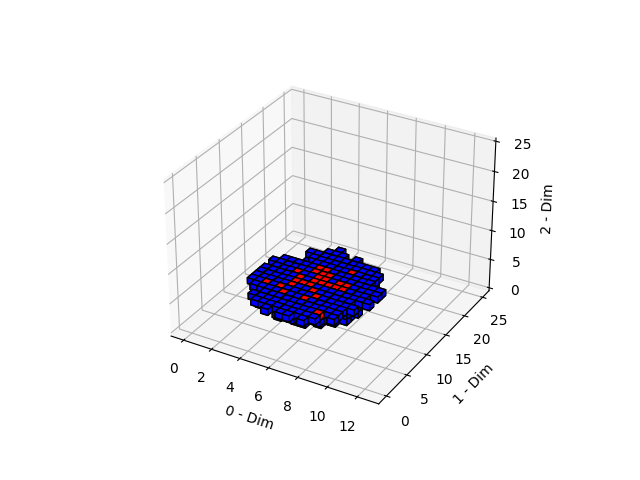

In [2]:
# pip3 install ipympl (to use interactive matplotlib graph)
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Make grid
iVoxels = np.zeros((25, 25, 25))
oVoxels = np.zeros((25, 25, 25))

zcutoff = 4
# Activate single Voxel
for x, y, z in intVoxels:
    if z <= zcutoff:
        iVoxels[x, y, z] = True

for x, y, z in voxels:
    if z <= zcutoff:
        oVoxels[x, y, z] = True

x,y,z = np.indices(np.array(iVoxels.shape)+1)
ox,oy,oz = np.indices(np.array(oVoxels.shape)+1)

ax.voxels(x*0.5, y, z, iVoxels, color="red", edgecolor="k")
ax.voxels(ox*0.5, oy, oz, oVoxels, color="blue", edgecolor="k")

ax.set_xlabel('0 - Dim')
ax.set_ylabel('1 - Dim')
ax.set_zlabel('2 - Dim')

plt.show()